In [1]:
#IMPORTING REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [2]:
#Reading the csv as a pandas data frame
df = pd.read_csv('DATASET.csv', header=0)

In [3]:
#Printing the top entries of the data frame
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Reformatting the data by changing everything to lowercase and replacing multiple spaces with an underscore
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [5]:
#Checking the reformating
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [6]:
#Renaming
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [7]:
#
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


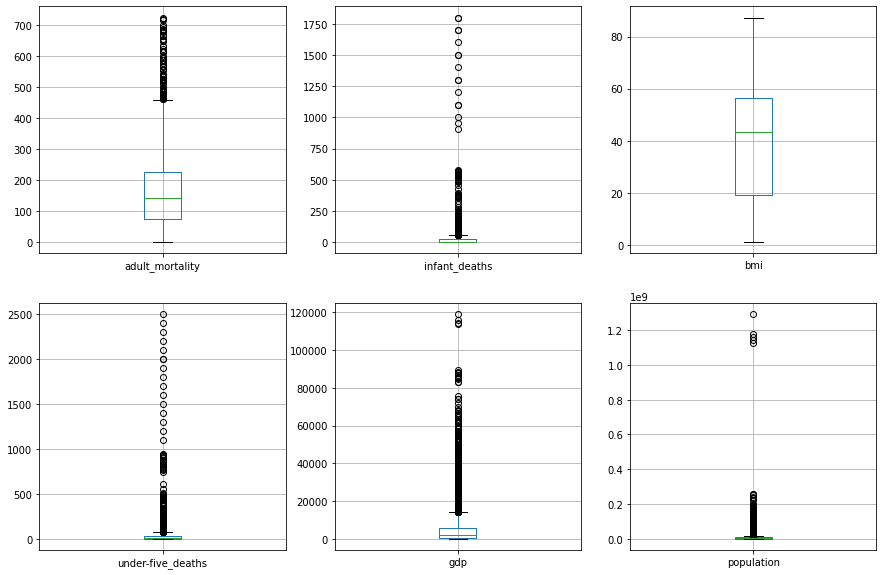

In [8]:
#Plotting the graphs
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

In [9]:
#Detecting null values
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [10]:
#computing 5th percentile and replacing null values with 0
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [11]:
#Computing null values
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [12]:
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null val

In [13]:
#Remoing BMI 
df.drop(columns='bmi', inplace=True)

In [14]:
#Adding the yearwise means to the data frame
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [15]:
#Check if null free
nulls_breakdown(df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


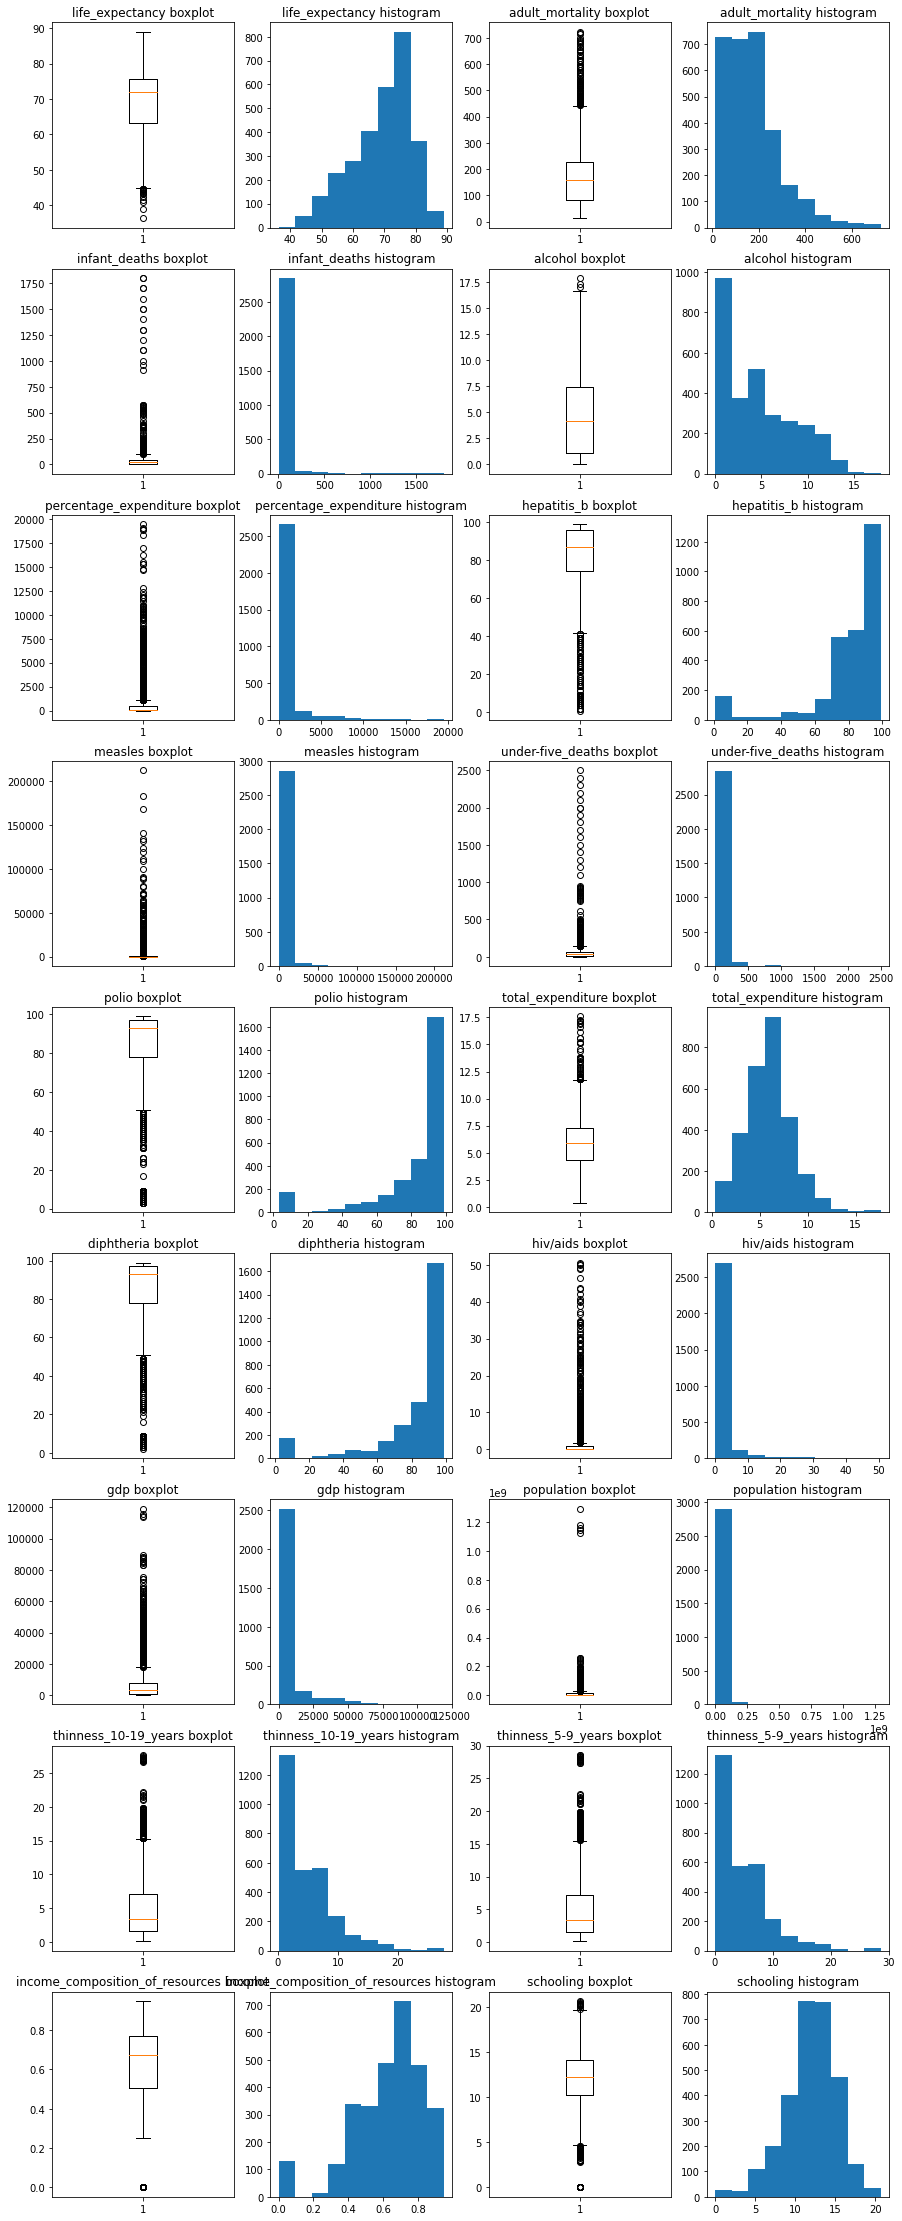

In [16]:
#Plotting outliers
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

In [17]:
#Calculating outlier percentage
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [18]:
for col in cont_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------

In [19]:
#Creating a model
data=pd.get_dummies(df, columns=['country','status'])
X = data.drop('life_expectancy', axis=1)
y = data['life_expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 213), (588, 213), (2350,), (588,))

In [21]:
#Calculationg R2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
print('R2 score is : {:.2f}'.format(r2_score(y_test, gbr_pred)))

R2 score is : 0.94


In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
outliers1= outliers[:60]
outliers2 = outliers[60:120]
outliers3 = outliers[120:180]
outliers4 = outliers[180:]
outliers1,outliers2,outliers3,outliers4

(                                   0
 adult_mortality                   97
 alcohol                            3
 country                            0
 diphtheria                       298
 gdp                              300
 hepatitis_b                      222
 hiv/aids                         542
 income_composition_of_resources  130
 infant_deaths                    135
 life_expectancy                   17
 measles                          542
 percentage_expenditure           389
 polio                            279
 population                       203
 schooling                         77
 status                             0
 thinness_10-19_years             100
 thinness_5-9_years                99
 total_expenditure                 51
 under-five_deaths                142
 year                               0,
 Empty DataFrame
 Columns: [0]
 Index: [],
 Empty DataFrame
 Columns: [0]
 Index: [],
 Empty DataFrame
 Columns: [0]
 Index: [])

In [23]:
#R2 score between test and predicted data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
rf_pred=rf.predict(X_test)

In [25]:
print('R2 score is : {:.2f}'.format(r2_score(y_test, rf_pred)))

R2 score is : 0.96


In [26]:
rf.feature_importances_

array([6.00791001e-03, 1.28939321e-01, 3.26100551e-03, 9.86419832e-03,
       5.02765740e-03, 2.17846056e-03, 7.98067254e-03, 6.42089596e-03,
       4.89367245e-03, 5.74286170e-03, 4.22662358e-03, 5.87124338e-01,
       3.07784093e-03, 2.91320046e-03, 6.43687308e-03, 1.05818258e-02,
       1.72407973e-01, 2.13619306e-02, 2.25015155e-06, 1.94925122e-05,
       1.76582409e-06, 4.78764533e-04, 1.36149705e-05, 4.69990003e-05,
       2.19254642e-06, 1.51342013e-06, 7.28547219e-06, 1.37030448e-04,
       5.21711505e-06, 2.56155271e-06, 2.18661046e-05, 5.43676652e-06,
       7.16938974e-06, 2.82880821e-05, 9.35300922e-05, 9.89013512e-05,
       3.29194530e-05, 1.20757384e-04, 1.45274223e-04, 4.69332958e-06,
       6.85465208e-06, 1.40357337e-06, 9.37322893e-06, 1.80101264e-05,
       7.79378542e-06, 9.19270371e-05, 4.13972522e-05, 3.72312543e-05,
       9.39730584e-06, 5.91096140e-05, 6.65797937e-06, 7.36905220e-05,
       3.05766430e-05, 2.08373939e-06, 2.52143787e-05, 9.24028761e-06,
      

In [27]:
import seaborn as sns
# Helper function for plotting feature importance
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

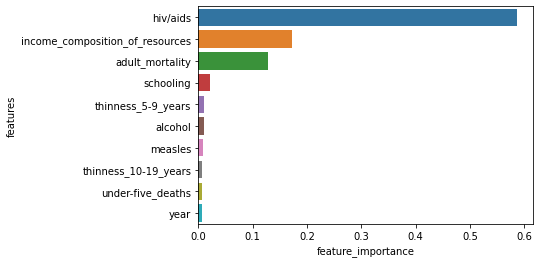

In [28]:
plot_features(X_train.columns, rf.feature_importances_)

In [29]:
new_data = data[['hiv/aids','adult_mortality','income_composition_of_resources','schooling',
      'thinness_5-9_years','under-five_deaths','infant_deaths',
      'thinness_10-19_years','year']]
X_train, X_test, y_train, y_test = train_test_split(new_data,y, test_size=0.2, random_state=42)

In [30]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
rf_pred_new = rf.predict(X_test)

In [32]:
print('R2 score is : {:.3f}'.format(r2_score(y_test, rf_pred_new)))

R2 score is : 0.964


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
from sklearn.linear_model import LinearRegression
#Linear regression model
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)


LinearRegression()

In [34]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [35]:
predictions1=Linear_model.predict(X_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions1)**(0.5))

2.091020059351187


In [36]:
#R2 score from the regression model
from sklearn.metrics import r2_score
r2_score(y_test,predictions1)

0.9498354124881555

In [37]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)
predictions2=ridge_model.predict(X_test)
print(mean_squared_error(y_test,predictions2)**(0.5))

2.274652908590531


c:\users\priya\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00338e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [38]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.00000001)
lasso_model.fit(X_train,y_train)
r2_score(y_test,predictions2)

c:\users\priya\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3388.6275482324954, tolerance: 20.12723566268933
  model = cd_fast.enet_coordinate_descent(


0.9406376451477018